In [1]:
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rnaseq = pd.read_csv("RNAseq_snakemake.tsv", sep='\t')
rnaseq = rnaseq.set_index('gene')
ab_div = pd.read_csv("Individual_Diversity_Spectra_Microbiome_130121.tsv", sep='\t')
fish_info = pd.read_csv("fish IDs.csv", header=None)
gene_list = pd.read_csv("killifish_human_ortho.csv")

In [3]:
rnaseq = rnaseq.transpose()

In [4]:
ID_dict = dict(zip(fish_info[3], fish_info[2]))

In [5]:
rnaseq.index = rnaseq.index.map(ID_dict)

In [7]:
#select genes
#symbols to search for
gene_list = gene_list.dropna()
gene_list = gene_list[gene_list['HGNC.symbol'].str.contains('IL1|IL4|IL6|IL10|IL11|IL13|TNF|NFKB|CRP')]
gene_list = list(gene_list['Gene.stable.ID'])

In [8]:
rnaseq = rnaseq.loc[:, rnaseq.columns.isin(gene_list)]
#rnaseq = rnaseq[genes]

In [9]:
# adding age
rnaseq['age'] = [1,1,1,0,0,0,0]

In [10]:
#Q_value
Q = 0.10
ab_div = ab_div[ab_div['Q'].isin([Q])]

In [11]:
ab_div_dict = dict(zip(ab_div['ID'], ab_div['D']))

In [12]:
rnaseq['diversity'] = rnaseq.index.map(ab_div_dict)

In [13]:
partial_corr_dict = {}

In [14]:
rnaseq['Age'] = ['16wk', '16wk', '16wk', '6wk', '6wk', '6wk', '6wk']

<ipython-input-17-71fc906fa69f>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


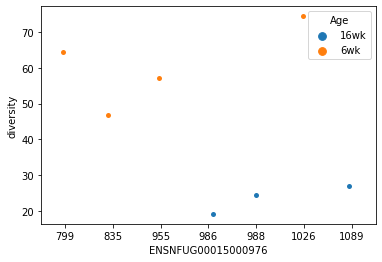

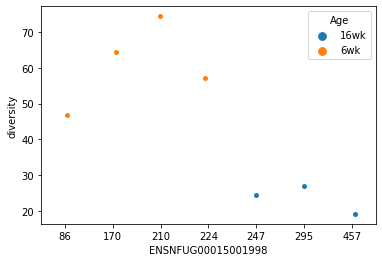

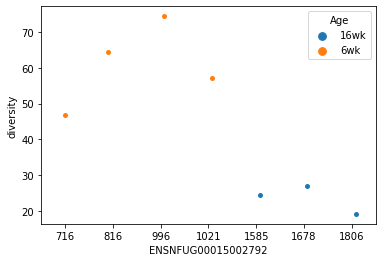

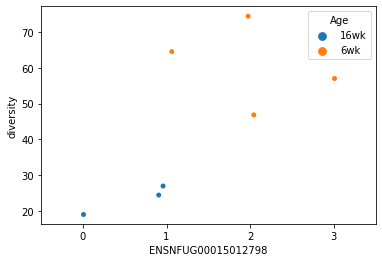

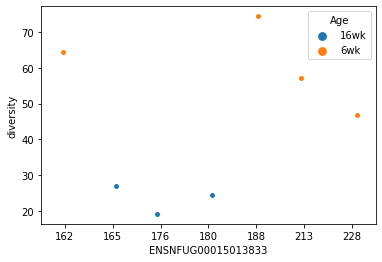

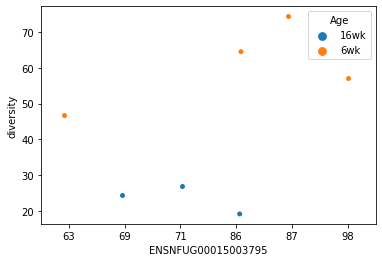

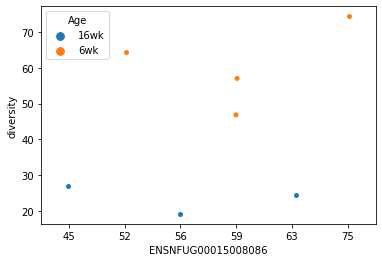

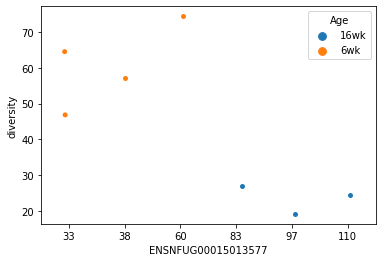

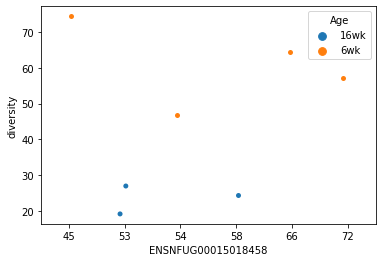

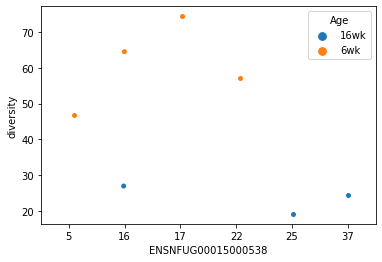

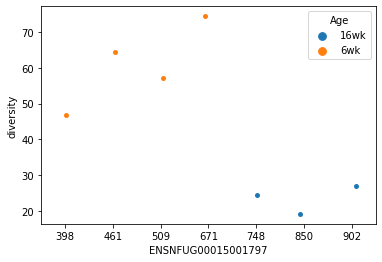

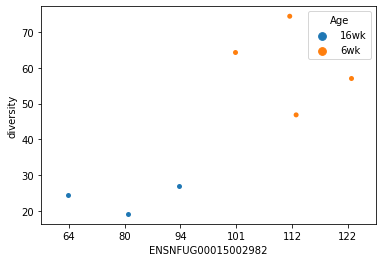

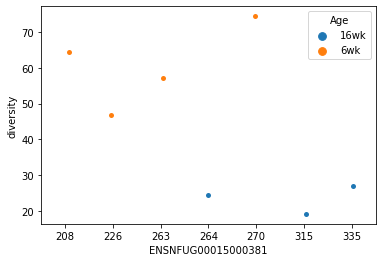

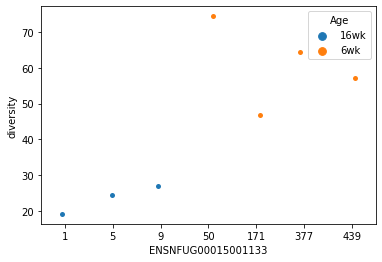

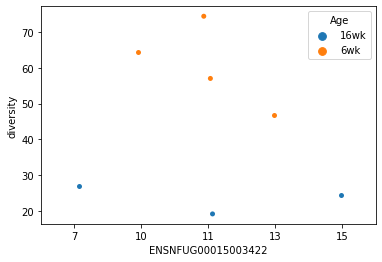

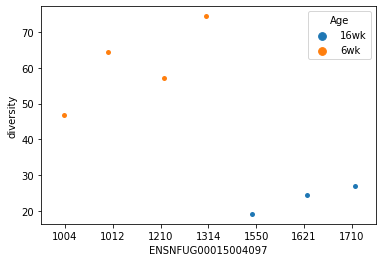

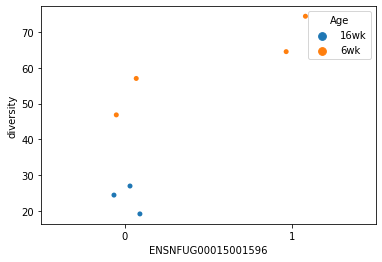

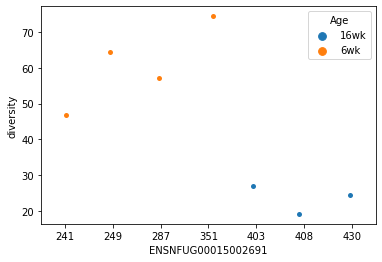

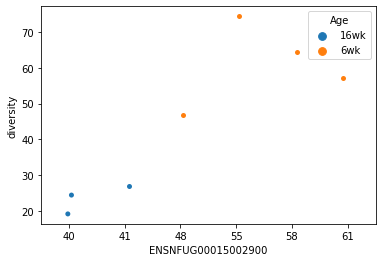

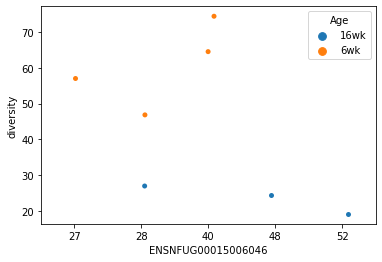

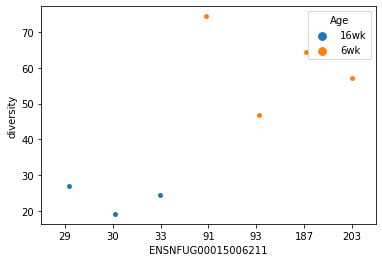

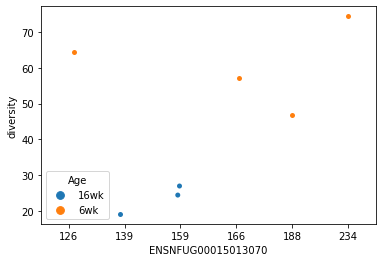

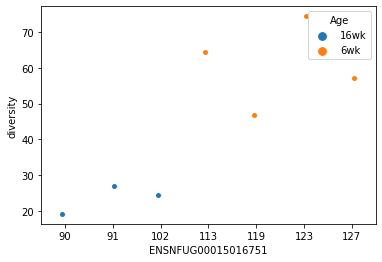

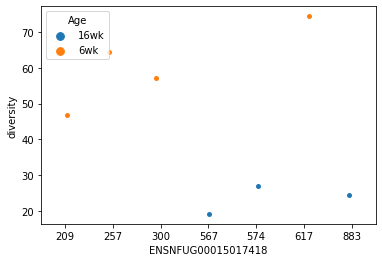

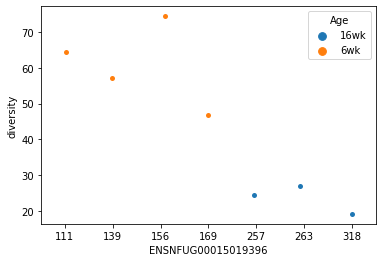

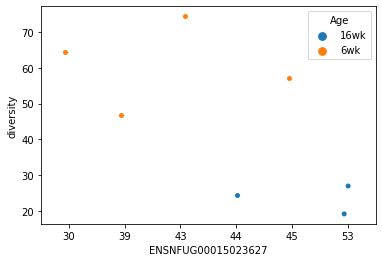

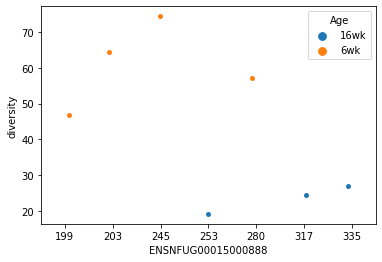

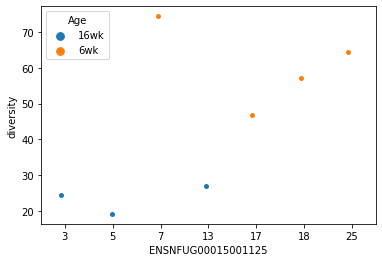

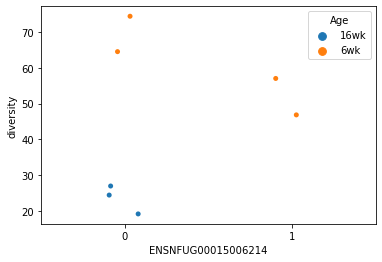

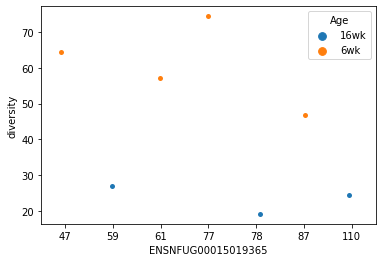

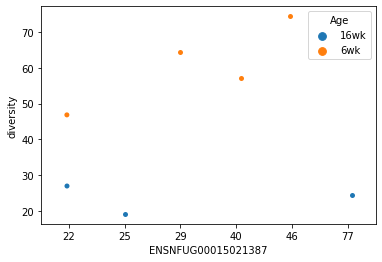

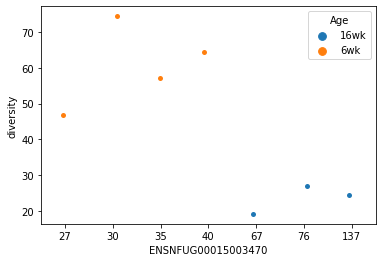

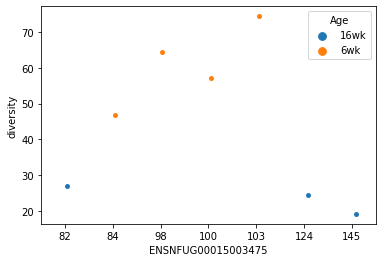

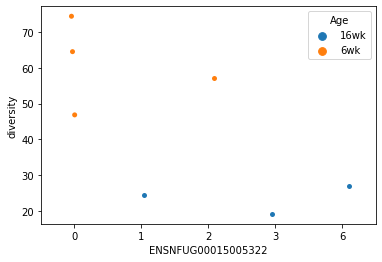

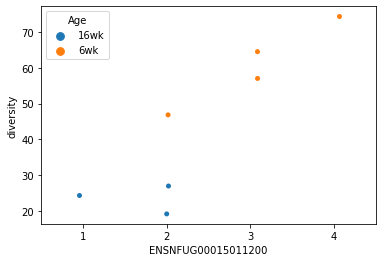

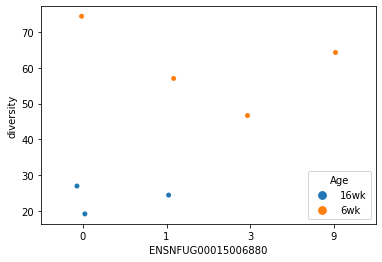

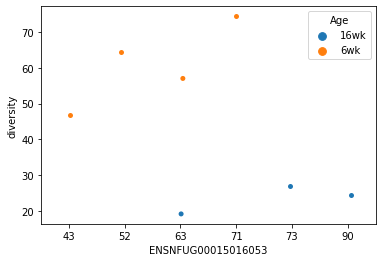

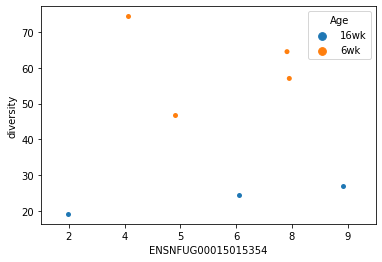

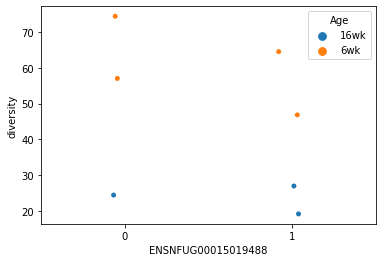

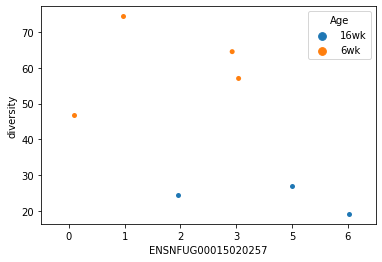

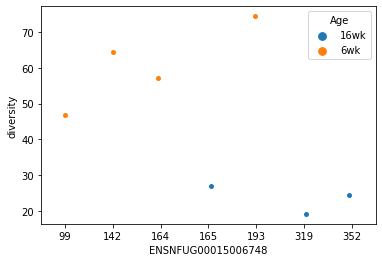

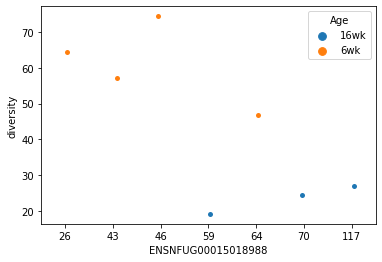

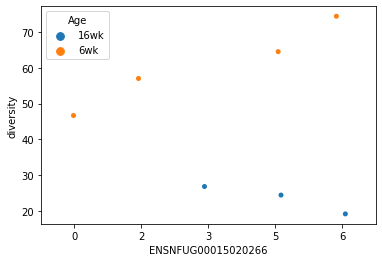

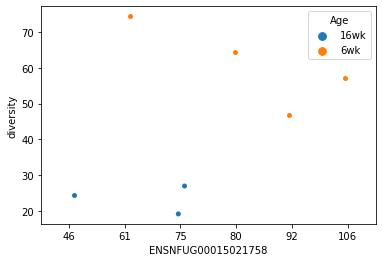

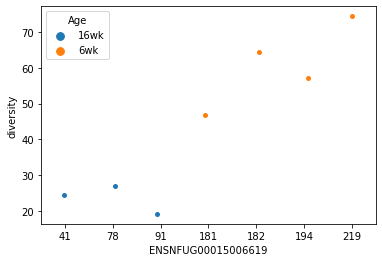

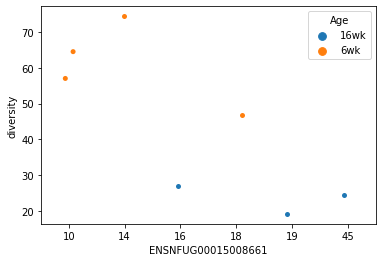

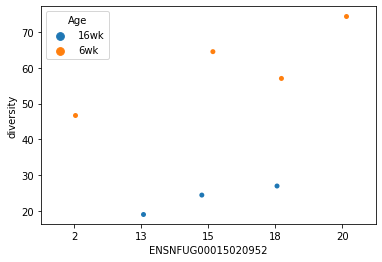

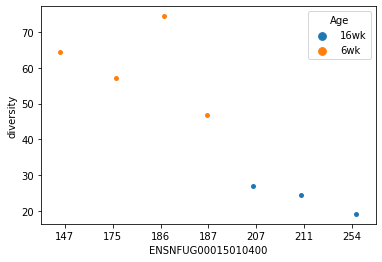

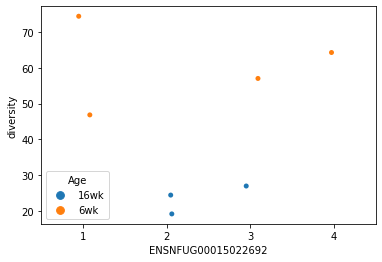

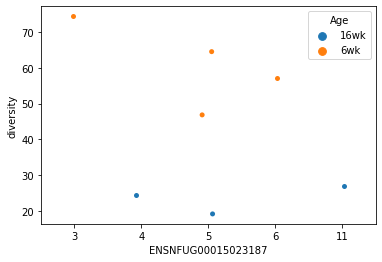

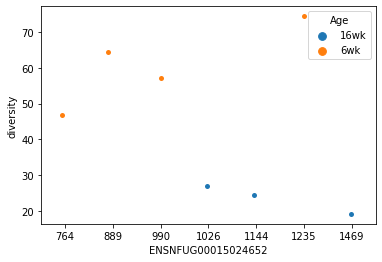

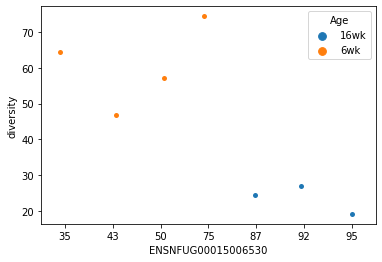

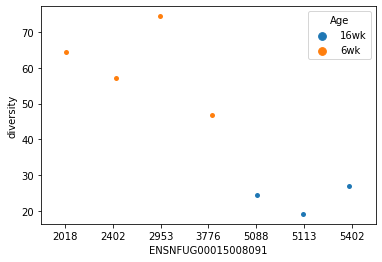

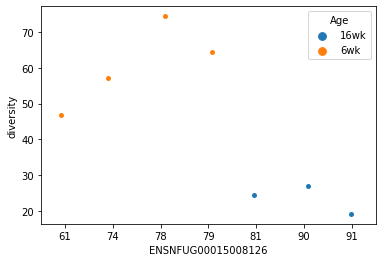

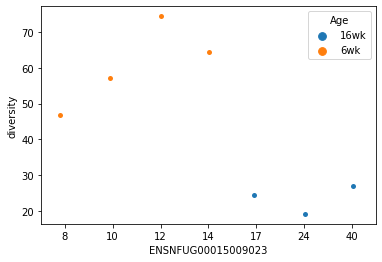

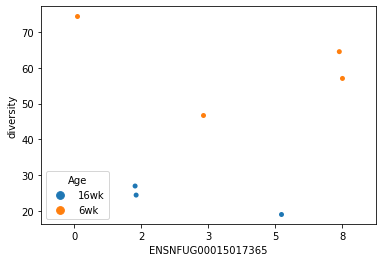

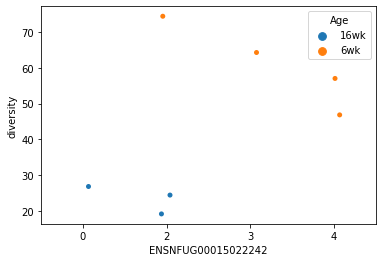

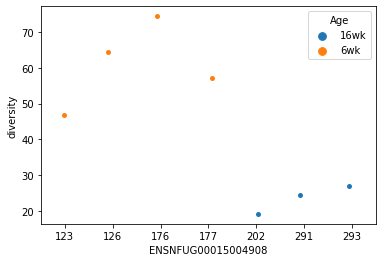

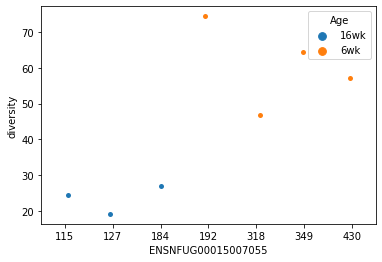

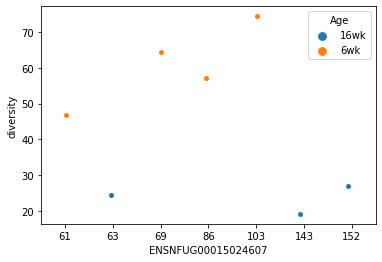

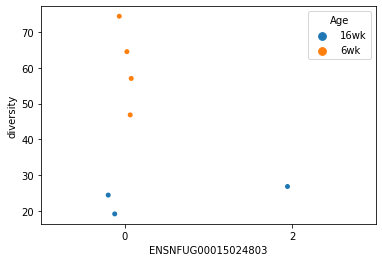

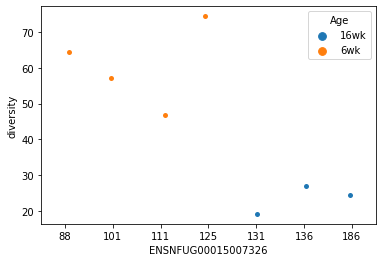

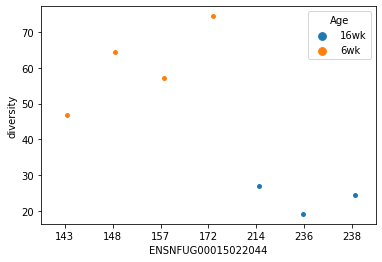

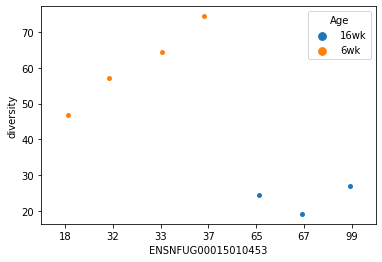

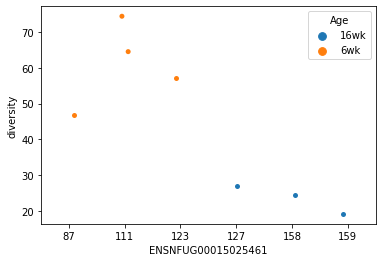

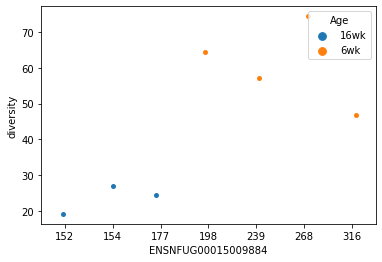

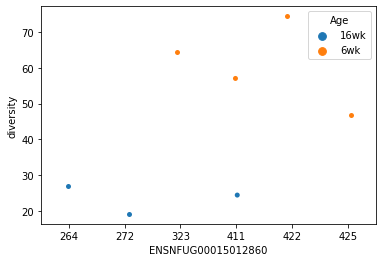

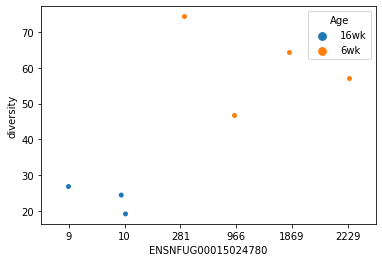

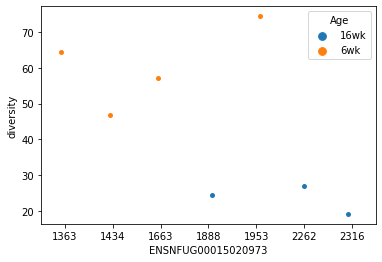

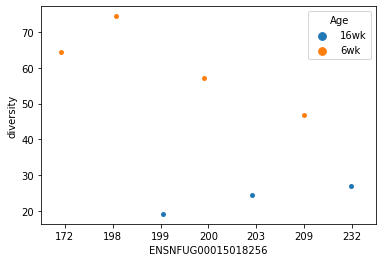

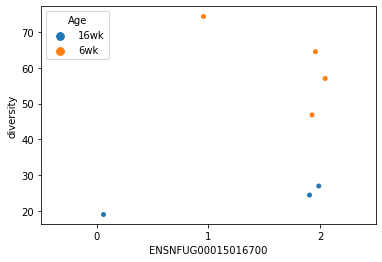

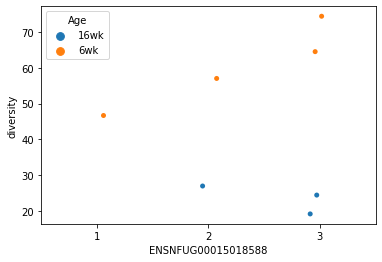

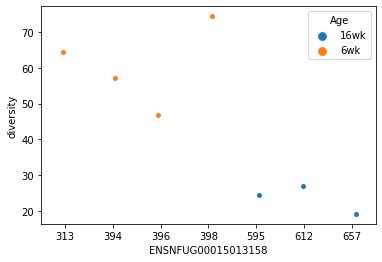

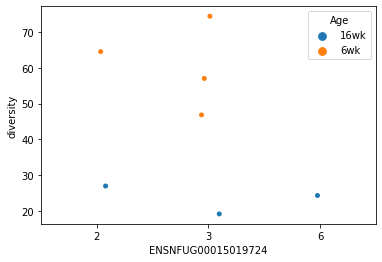

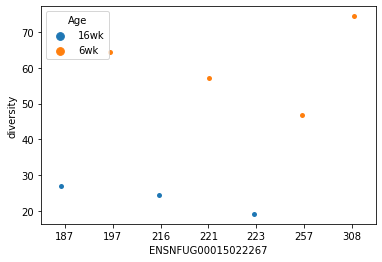

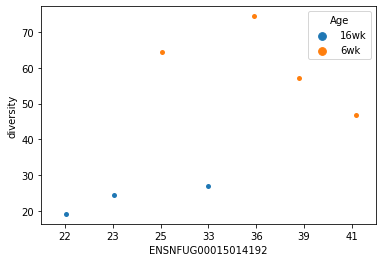

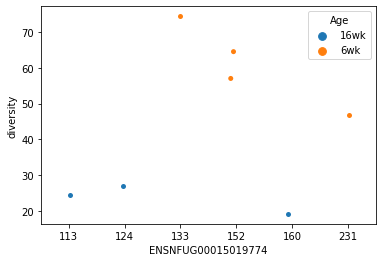

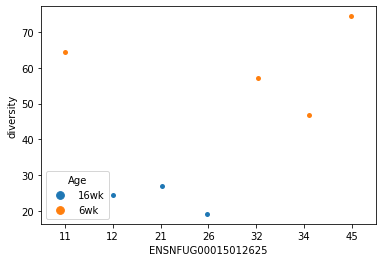

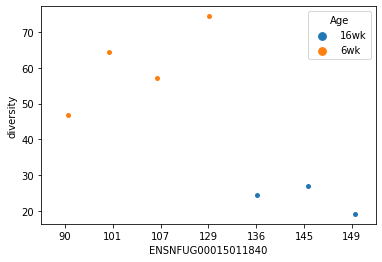

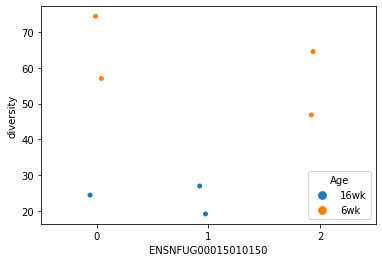

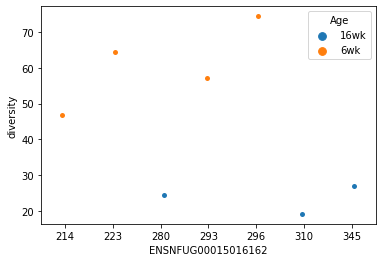

In [17]:
#will use partial_corr here instead
for i in rnaseq.columns[:-3]:
    result = pg.partial_corr(data=rnaseq, x=i, y='diversity', covar='age')
    partial_corr_dict[i] = result
    
    plt.figure()
    sns_plot = sns.stripplot(x=i, y="diversity", data=rnaseq, hue="Age")
    fig = sns_plot.get_figure()
    fig.savefig(str(i) + "_240621.png", dpi=1000)
    plt.close

In [23]:
partial_corr_dict.values()

dict_values([         n         r          CI95%     p-val
pearson  7  0.430762  [-0.59, 0.92]  0.393822,          n         r          CI95%     p-val
pearson  7  0.570783  [-0.45, 0.94]  0.236804,          n        r          CI95%    p-val
pearson  7 -0.42501  [-0.92, 0.59]  0.40087,          n         r          CI95%     p-val
pearson  7  0.705319  [-0.25, 0.96]  0.117461,          n         r         CI95%    p-val
pearson  7  0.329132  [-0.66, 0.9]  0.52413,          n         r         CI95%     p-val
pearson  7 -0.351086  [-0.9, 0.64]  0.495008,          n         r          CI95%     p-val
pearson  7 -0.781266  [-0.97, 0.08]  0.066535,          n         r          CI95%     p-val
pearson  7  0.494706  [-0.53, 0.93]  0.318476,          n         r          CI95%    p-val
pearson  7 -0.489031  [-0.93, 0.53]  0.32493,          n         r          CI95%    p-val
pearson  7  0.294837  [-0.68, 0.89]  0.57056,          n         r          CI95%     p-val
pearson  7  0.201162  [-0